<a href="https://colab.research.google.com/github/gokulraj8888/project-3/blob/main/project3_E_COMMERCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

In [4]:
rawdata = pd.read_excel("/content/cust_data.xlsx")
rawdata.head(4)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1.0,M,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,M,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data=rawdata.copy(deep=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cust_ID                 30000 non-null  float64
 1   Gender                  27276 non-null  object 
 2   Orders                  30000 non-null  float64
 3   Jordan                  30000 non-null  float64
 4   Gatorade                30000 non-null  float64
 5   Samsung                 30000 non-null  float64
 6   Asus                    30000 non-null  float64
 7   Udis                    30000 non-null  float64
 8   Mondelez International  30000 non-null  float64
 9   Wrangler                30000 non-null  float64
 10  Vans                    30000 non-null  float64
 11  Fila                    30000 non-null  float64
 12  Brooks                  30000 non-null  float64
 13  H&M                     30000 non-null  float64
 14  Dairy Queen             30000 non-null

In [7]:
data.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [8]:
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [9]:
data.shape

(30000, 38)

In [10]:
missing_values=data.isnull().sum()
missing_values

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [11]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data.isnull().sum().sum()

0

In [12]:
data['Gender'].value_counts()

F    24778
M     5222
Name: Gender, dtype: int64

In [13]:
data.drop(columns = ['Cust_ID'], inplace = True)

In [14]:
data.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,M,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


DATA VISUALIZATION

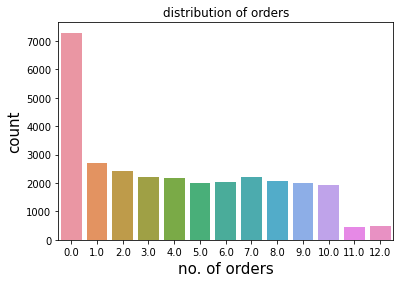

In [15]:
sns.countplot(data=rawdata,x='Orders')
plt.title('distribution of orders')
plt.xlabel('no. of orders',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

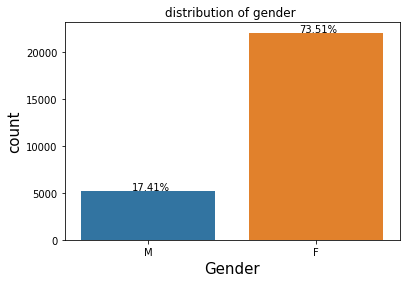

In [16]:
#2. Distribution of the gender of the customers

sns.countplot(data=rawdata,x='Gender')
plt.title('distribution of gender ')
plt.xlabel('Gender',fontsize=15)
plt.ylabel('count',fontsize=15)
# to showpercent on top of bar
# x and y gives the position of text
# s is the text
plt.text(x=-0.1,y=rawdata.Gender.value_counts()[1]+ 20, s=str(round((rawdata.Gender.value_counts()[1])*100/len(rawdata.Gender),2)) + '%')
plt.text(x=0.9,y=rawdata.Gender.value_counts()[0]+ 20, s=str(round((rawdata.Gender.value_counts()[0])*100/len(rawdata.Gender),2)) + '%')
plt.show()

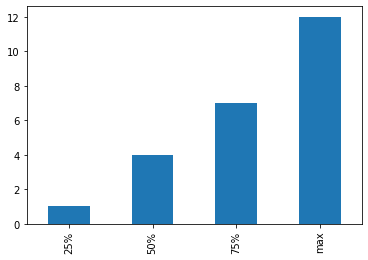

In [17]:
data.Orders.describe()[4:].plot(kind='bar')

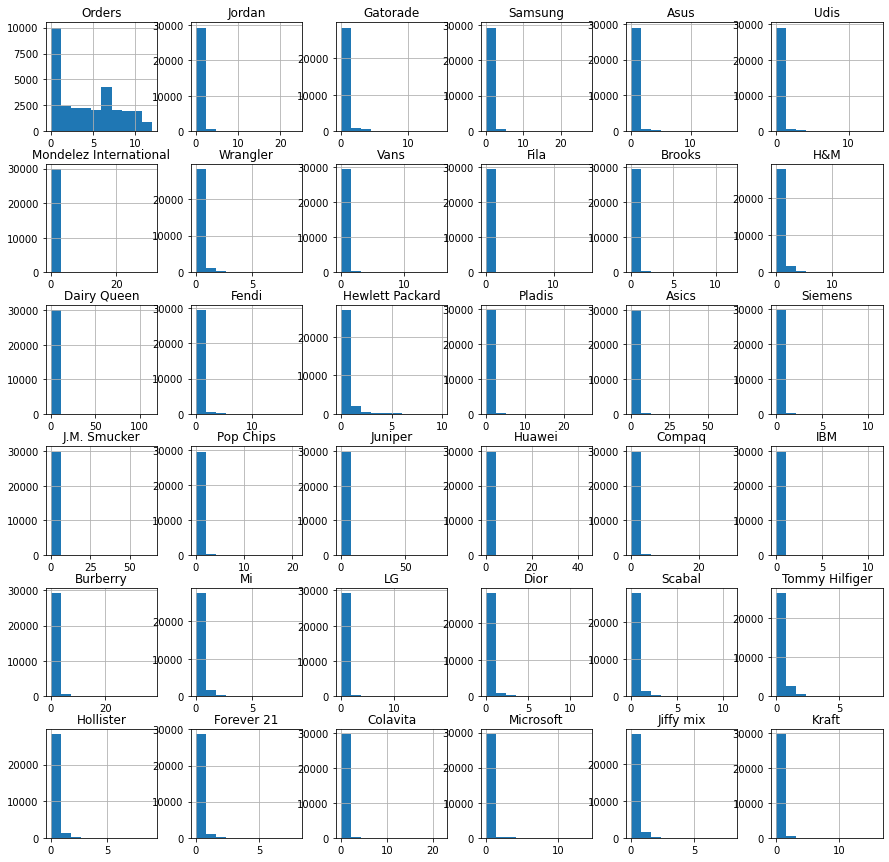

In [18]:
fig=data.hist(figsize=(15,15))

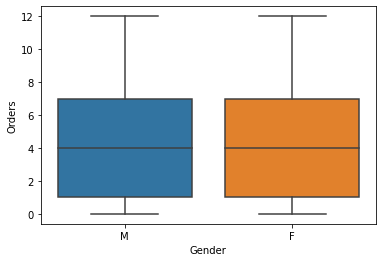

In [19]:
sns.boxplot( x="Gender", y='Orders', data=data)

Text(0.5, 1.0, 'heatmap for missing values')

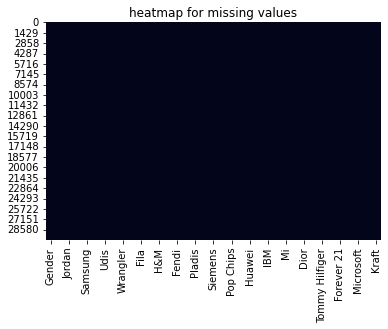

In [20]:
sns.heatmap(data.isnull(),cbar=False)
plt.title('heatmap for missing values')

STANDARDIZATION

In [21]:
data1=pd.get_dummies(data,columns=['Gender'])
data1.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0


In [22]:
data2=data1.drop(['Orders','Gender_F','Gender_M'],axis=1)
data2.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [23]:
scale=StandardScaler()
data=scale.fit_transform(data2)
data

array([[-0.33231249, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249,  1.05998399, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249,  1.05998399, -0.24298472, ...,  1.97870833,
        -0.22048554, -0.18277495],
       ...,
       [-0.33231249,  1.05998399, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [ 2.15288625, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495]])

In [24]:
data1.columns

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_F',
       'Gender_M'],
      dtype='object')

In [25]:
X=pd.DataFrame(data,columns=data1.columns[1:36])
X

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,1.824571,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29996,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29997,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29998,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775


Applying K-Means Algorithm

Build a Model with multiple K_means

In [26]:
n_clusters=[4,5,6,7,8]
for k in n_clusters:
    cluster=KMeans(k)
    predict=cluster.fit_predict(X)
    score=silhouette_score(X,predict,random_state=10)
    print ("For n_clusters = {}, silhouette score is {})".format(k, score))

For n_clusters = 4, silhouette score is 0.28838873444868107)
For n_clusters = 5, silhouette score is 0.2746335999460895)
For n_clusters = 6, silhouette score is 0.1629604134334544)
For n_clusters = 7, silhouette score is 0.20413622636378229)
For n_clusters = 8, silhouette score is 0.1999497750565957)


In [27]:
# building k means model for k =4
model=KMeans(n_clusters=4,random_state=10)
model.fit(X)

KMeans(n_clusters=4, random_state=10)

Retrive the Clusters

In [28]:
data_output=rawdata.copy(deep=True)
data_output['cluster']=model.labels_
data_output.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,1.0,M,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2.0,F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,3.0,M,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,4.0,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5.0,NaN,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0


In [29]:
# check the size of each cluster
np.unique(model.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([ 1255, 22772,  5272,   701]))

Text(2.85, 2000, '701')

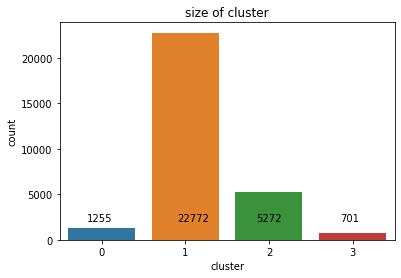

In [30]:
#plot a barplot to visualise the cluster size
sns.countplot(data=data_output,x='cluster')
plt.title('size of cluster')
plt.text(x=-.18,y=2000,s=np.unique(model.labels_,return_counts=True)[1][0])
plt.text(x=.9,y=2000,s=np.unique(model.labels_,return_counts=True)[1][1])
plt.text(x=1.85,y=2000,s=np.unique(model.labels_,return_counts=True)[1][2])
plt.text(x=2.85,y=2000,s=np.unique(model.labels_,return_counts=True)[1][3])

Cluster Centers

the cluster center gives informaion about the the variables belonging to the clusters

In [31]:
center=pd.DataFrame(model.cluster_centers_,columns=data_output.columns[3:38])
center.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.446911,0.464653,0.233811,0.158847,0.102969,0.253960,0.317851,0.385554,0.095476,0.808415,...,1.396351,0.631866,0.290554,1.137030,0.335733,0.417016,1.391345,0.806428,1.575620,1.922702
1,-0.158476,-0.157536,-0.084381,-0.116934,-0.121153,-0.087155,-0.113422,-0.076786,-0.039016,-0.123452,...,-0.088160,-0.161581,-0.191656,-0.142253,-0.148547,-0.141765,-0.076493,-0.068999,-0.079321,-0.082740
2,0.594856,0.569990,0.324250,0.474459,0.511302,0.314878,0.430609,0.257115,0.145073,0.358618,...,0.061868,0.565501,0.770176,0.350728,0.586942,0.535840,0.003689,0.104907,-0.020615,-0.087260
3,-0.116054,0.008321,-0.110823,-0.046447,-0.085908,0.013628,-0.116023,-0.125255,0.007833,-0.127840,...,-0.099359,-0.125881,-0.074137,-0.045926,-0.180266,-0.162539,-0.032771,0.010947,-0.088290,-0.098193


In [ ]:
#Cluster Analysis

In [32]:
cluster_1=sorted(zip(list(center.iloc[0,:]),list(center.columns)),reverse=True)[:10]
cluster_1

[(2.5683633928700207, 'Pladis'),
 (2.5566711435400533, 'Burberry'),
 (1.9227024096897427, 'Kraft'),
 (1.9073294208644698, 'Dairy Queen'),
 (1.575619545523192, 'Jiffy mix'),
 (1.3963507697171844, 'LG'),
 (1.3913445112503853, 'Colavita'),
 (1.3864121214217768, 'Pop Chips'),
 (1.207535047336853, 'J.M. Smucker'),
 (1.1370303957637249, 'Tommy Hilfiger')]

In [33]:
np.unique(model.labels_,return_counts=True)[1][0] #size

1255

sort the variables

In [34]:
cluster_1_var=pd.DataFrame(cluster_1)[1]
cluster_1_var

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

In [35]:
cluster_2=sorted(zip(list(center.iloc[1,:]),list(center.columns)),reverse=True)[:10]
cluster_2

[(-0.017300283220996093, 'IBM'),
 (-0.03901645356307062, 'Fila'),
 (-0.055304851992874375, 'Hewlett Packard'),
 (-0.05631154842238818, 'Compaq'),
 (-0.06899225921253258, 'Fendi'),
 (-0.06899895112799385, 'Microsoft'),
 (-0.07649272672741791, 'Colavita'),
 (-0.0767861121872721, 'Vans'),
 (-0.07932113224858964, 'Jiffy mix'),
 (-0.0827404232942301, 'Kraft')]

In [36]:
#1. size
np.unique(model.labels_,return_counts=True)[1][1]

22772

In [37]:
# 2. sort
cluster_2_var=pd.DataFrame(cluster_2)[1]
cluster_2_var

0                IBM
1               Fila
2    Hewlett Packard
3             Compaq
4              Fendi
5          Microsoft
6           Colavita
7               Vans
8          Jiffy mix
9              Kraft
Name: 1, dtype: object

In [38]:
cluster_3=sorted(zip(list(center.iloc[2,:]),list(center.columns)),reverse=True)[:10]
cluster_3

[(0.7701757489709979, 'Scabal'),
 (0.5948559923975795, 'Jordan'),
 (0.5869420849637125, 'Hollister'),
 (0.5699901524200979, 'Gatorade'),
 (0.5655013593708393, 'Dior'),
 (0.5438465382729089, 'H&M'),
 (0.53583978750718, 'Forever 21'),
 (0.5113016084652766, 'Udis'),
 (0.5044601305848015, 'Huawei'),
 (0.4744591715429245, 'Asus')]

In [39]:
#1. size
np.unique(model.labels_,return_counts=True)[1][2]

5272

In [40]:
#2.sort
cluster_3_var=pd.DataFrame(cluster_3)[1]
cluster_3_var

0        Scabal
1        Jordan
2     Hollister
3      Gatorade
4          Dior
5           H&M
6    Forever 21
7          Udis
8        Huawei
9          Asus
Name: 1, dtype: object

In [41]:
cluster_4=sorted(zip(list(center.iloc[3,:]),list(center.columns)),reverse=True)[:10]
cluster_4

[(4.612421213336683, 'Siemens'),
 (3.757106120080634, 'Asics'),
 (0.3762419165162781, 'J.M. Smucker'),
 (0.11864320568860025, 'Pop Chips'),
 (0.06776496739127584, 'Juniper'),
 (0.06414297821158868, 'Huawei'),
 (0.041533950099074096, 'Mi'),
 (0.030422522349300617, 'Compaq'),
 (0.01362848793884517, 'Mondelez International'),
 (0.010947162250401665, 'Microsoft')]

In [42]:
#1. size
np.unique(model.labels_,return_counts=True)[1][3]

701

In [ ]:
#2.sort
cluster_4_var=pd.DataFrame(cluster_4)[1]
cluster_4_va

Conclusion:

Hence we have segmented the customer data into 4 clusters. we have used the silhouette score method to find the optimum number of clusters and decided k=4 as the best pick after analysing the silhouette score.

we segmented the customers under 'Grocery','Appearls','Electronics'and 'Basket class' categories.

This type of segmentation can help the e-commerce companies , to know the customer choices and they can provide more accurate recommendation to the customers.